In [3]:
import pandas as pd
import numpy as np
import pickle
import statsmodels.api as sm
import statsmodels.formula.api as smf

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
%pylab inline
%config InlineBackend.figure_formats = ['retina']

sns.set_style("whitegrid", {"font.family": ["serif"]})
sns.set_context("talk")

Populating the interactive namespace from numpy and matplotlib


In [125]:
with open('wine_data_longer.pkl', 'rb') as picklefile: 
    wine_data = pickle.load(picklefile)

In [6]:
wine_data.head()

,Average Rating,Winery,Wine Name,Vintage,Type,Region,Country,Number of Reviews,Average Price
0,4.298098,Veuve Clicquot,Brut (Carte Jaune) Champagne,N.V.,Sparkling wine,Champagne,France,98098,49.99
1,4.187012,Moët & Chandon,Impérial Brut Champagne,N.V.,Sparkling wine,Champagne,France,87012,error
2,3.767924,Casal Garcia,Vinho Verde Branco,N.V.,White wine,Vinho Verde,Portugal,67924,error
3,4.352855,Farnese,Edizione Cinque Autoctoni,N.V.,Red wine,Abruzzo,Italy,52855,error
4,3.847411,Piccini,Memoro Rosso,N.V.,Red wine,Toscana,Italy,47411,10.99


In [127]:
#remove rows with no average price
wine_data = wine_data[wine_data['Average Price'] != 'error']

In [168]:
#move number of reviews out of average rating
'''
def strip_paren(x):
    if "(" in x:
        return x.split("(")[1]
    else:
        pass
'''

In [169]:
'''
wine_data_clean['Number of Reviews'] = wine_data_clean['Average Rating'].apply(strip_paren)
wine_data_clean['Number of Reviews'].replace(')', '')
wine_data_clean['Average Rating'] = wine_data_clean['Average Rating'].apply(lambda x: str(x).split('(')[0])
wine_data_clean['Number of Reviews'] = wine_data_clean['Number of Reviews'].apply(lambda x: str(x).replace(')', ''))
'''

<ipython-input-169-4b8022bec6c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_data_clean['Number of Reviews'] = wine_data_clean['Average Rating'].apply(strip_paren)
<ipython-input-169-4b8022bec6c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_data_clean['Average Rating'] = wine_data_clean['Average Rating'].apply(lambda x: str(x).split('(')[0])
<ipython-input-169-4b8022bec6c3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [128]:
#get rid of rows with messed up avg rating - its not many
#wine_data = wine_data[~wine_data["Average Rating"].isin(['('])]
wine_data = wine_data[:1400]

In [129]:
#drop rows with no year
wine_data = wine_data[wine_data['Vintage'] != 'N.V.']

In [130]:
#convert to numerical
wine_data['Average Rating'] = wine_data['Average Rating'].astype(float)
wine_data['Number of Reviews'] = wine_data['Number of Reviews'].astype(int)
wine_data['Average Price'] = wine_data['Average Price'].astype(float)
wine_data['Vintage'] = wine_data['Vintage'].astype(int)

In [131]:
wine_data.shape

(1288, 9)

In [12]:
#CHALLENGE 1
wine_data['Rating Mean'] = wine_data['Average Rating'].mean()

In [281]:
wine_data

,Average Rating,Winery,Wine Name,Vintage,Type,Region,Country,Number of Reviews,Average Price,Mean,Rating Mean
18,4.123169,Marqués de Riscal,Rioja Reserva,2014,Red wine,Rioja,Spain,23169,18.99,NaN,3.906712
28,4.618701,Dom Pérignon,Brut Champagne,2006,Sparkling wine,Champagne,France,18701,249.99,NaN,3.906712
30,3.618200,Casillero del Diablo,Cabernet Sauvignon (Reserva),2017,Red wine,Central Valley,Chile,18200,9.99,NaN,3.906712
35,3.717321,Apothic,Red (Winemaker's Blend),2014,Red wine,California,United States,17321,13.98,NaN,3.906712
45,4.316529,San Marzano,Cinquanta Collezione,2012,Red wine,Vino d'Italia,Italy,16529,23.21,NaN,3.906712
...,...,...,...,...,...,...,...,...,...,...,...
3165,3.731980,Paulo Laureano,Premium Vinhas Velhas Tinto,2015,Red wine,Alentejo,Portugal,3198,15.32,NaN,3.906712
3166,4.332000,Matarromera,Ribera del Duero Reserva,2014,Red wine,Ribera del Duero,Spain,3200,39.00,NaN,3.906712
3167,3.831960,Condado de Haza,Crianza Ribera del Duero,2012,Red wine,Ribera del Duero,Spain,3196,22.99,NaN,3.906712
3168,4.431960,Rutini,Malbec,2017,Red wine,Mendoza,Argentina,3196,26.99,NaN,3.906712


In [13]:
X = wine_data[['Rating Mean']]
y = wine_data['Average Rating']

lr = LinearRegression()
lr.fit(X, y)

y_predicted = lr.predict(X)

In [14]:
score = lr.score(X, y)
score

0.0

Text(0.5, 1.0, 'Actuals vs. Predicted - User Submitted Wine Ratings')

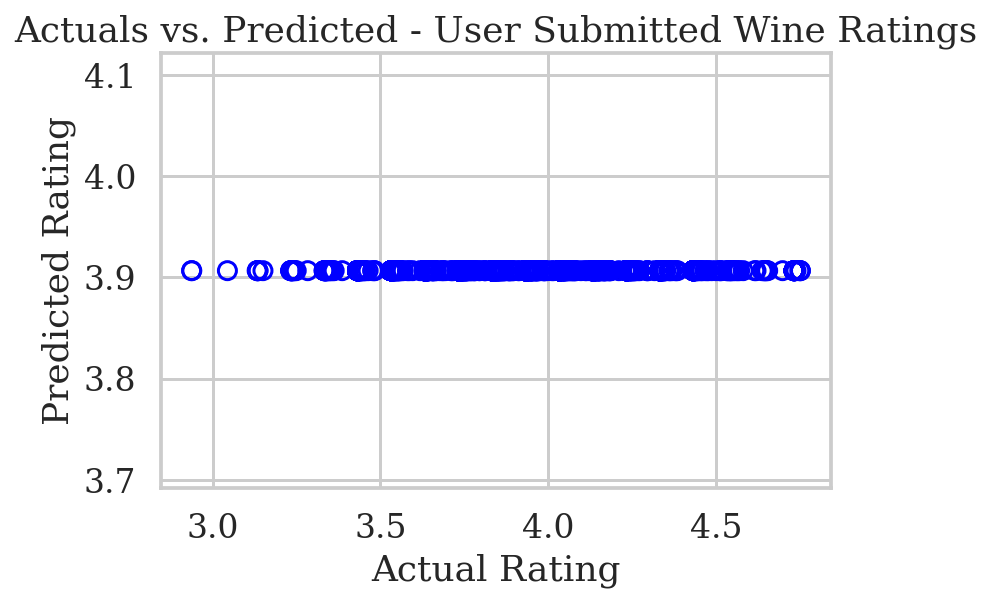

In [15]:
plt.scatter(y, y_predicted, facecolors='none', edgecolors='b')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actuals vs. Predicted - User Submitted Wine Ratings')

Text(0.5, 1.0, 'Histogram of Residuals')

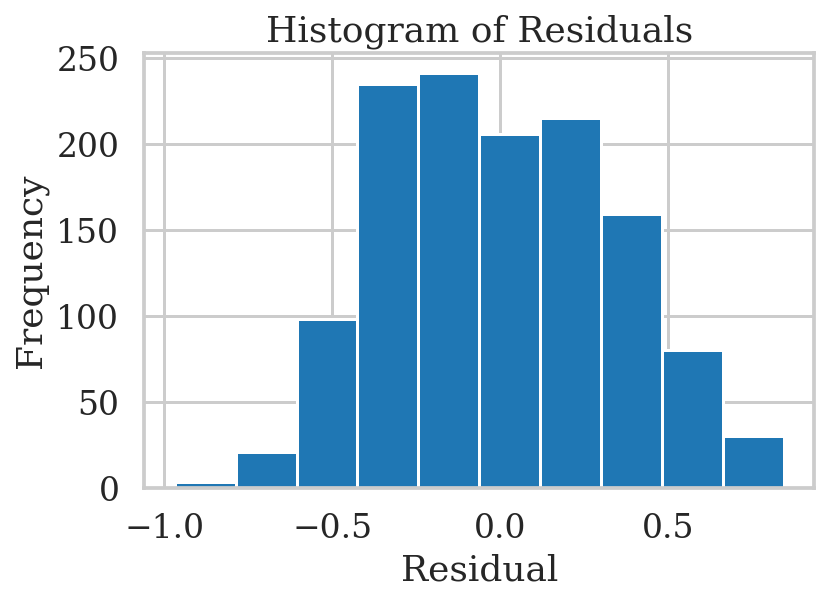

In [16]:
y_resid = y - y_predicted
hist(y_resid, bins=10)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')

In [234]:
#Challenge 2
X = wine_data[['', 'Average Price']]
y = wine_data['Average Rating']

lr = LinearRegression()
lr.fit(X, y)

y_predicted = lr.predict(X)

ValueError: could not convert string to float: 'Spain'

In [233]:
score = lr.score(X, y)
score

0.2524411659349115

In [19]:
lr.coef_

array([0.        , 0.00379403])

Text(0.5, 1.0, 'Actuals vs. Predicted - User Submitted Wine Ratings')

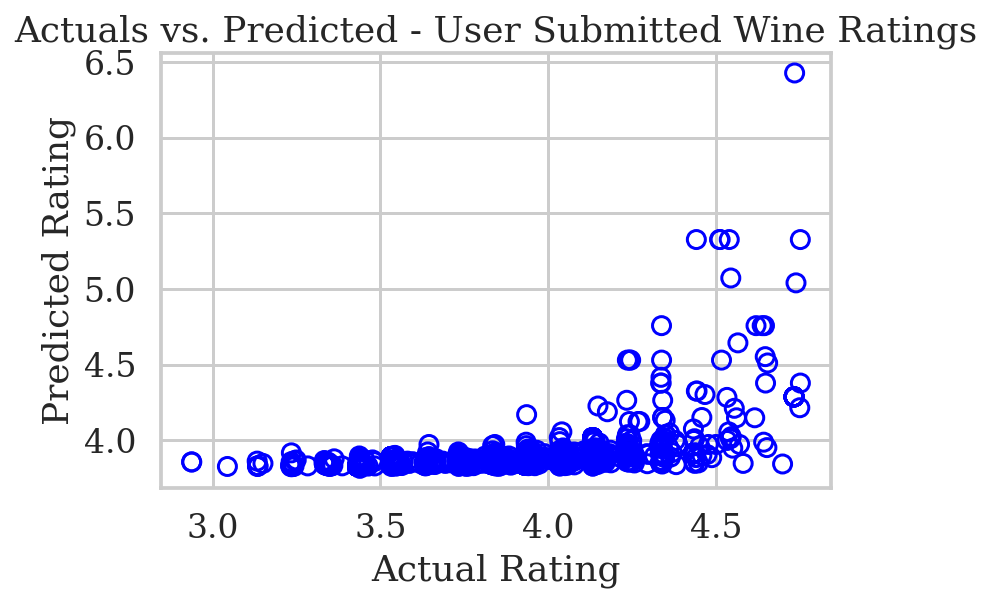

In [20]:
#actuals vs predicted
plt.scatter(y, y_predicted, facecolors='none', edgecolors='b')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actuals vs. Predicted - User Submitted Wine Ratings')

Text(0.5, 1.0, 'Histogram of Residuals')

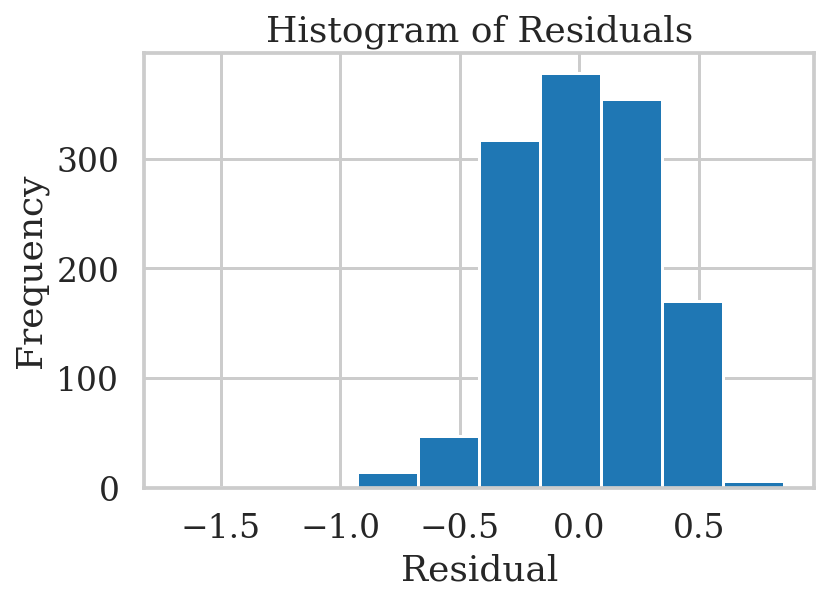

In [21]:
#hist of residuals
y_resid = y - y_predicted
hist(y_resid, bins=10)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')

Text(0.5, 1.0, 'Average Price vs. Predicted Rating')

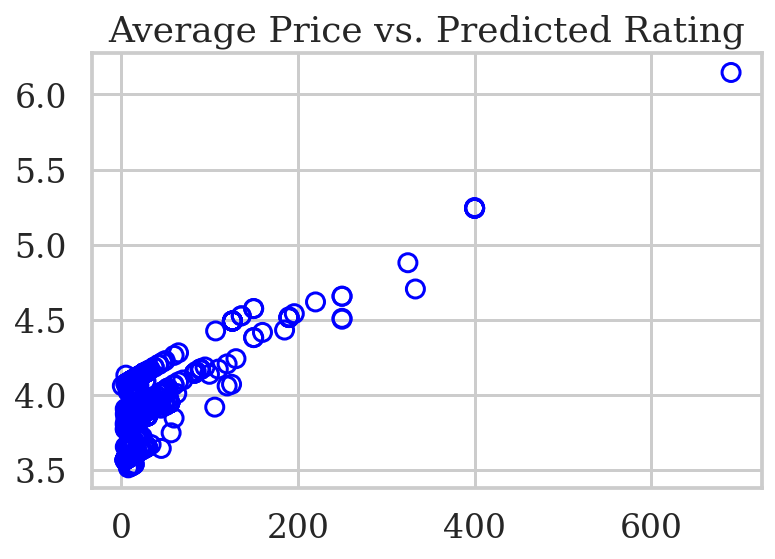

In [51]:
#average bottle price vs predicted rating
plt.scatter(wine_data['Average Price'], y_predicted, facecolors='none', edgecolors='b')
plt.title('Average Price vs. Predicted Rating')

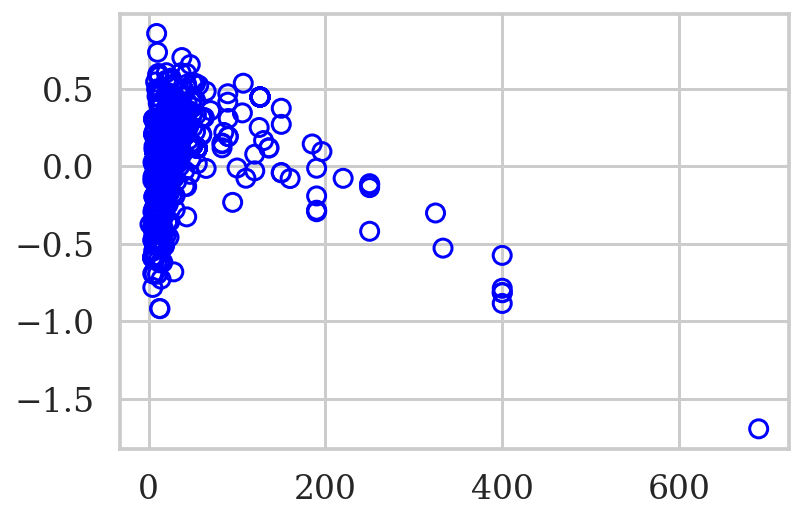

In [23]:
#average bottle price vs residuals
plt.scatter(wine_data['Average Price'], y_resid, facecolors='none', edgecolors='b')

In [34]:
#challenge 3
wine_data_dummies = pd.get_dummies(wine_data['Country'], drop_first = True)
wine_data_dummies

,Australia,Brazil,Chile,France,Georgia,Germany,Italy,Lebanon,Macedonia,Mexico,New Zealand,Portugal,South Africa,Spain,United States,Uruguay
18,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
28,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
30,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
45,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3165,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3166,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3167,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
combine_list = [wine_data, wine_data_dummies]
wine_data_with_dummies = pd.concat(combine_list, axis=1)

In [66]:
X = wine_data_with_dummies[['Average Price', 'Australia', 'Brazil', 'Chile', 
               'France', 'Georgia', 'Germany', 'Italy', 'Lebanon', 'Macedonia', 
              'Mexico', 'New Zealand', 'Portugal', 'South Africa', 'Spain', 
              'United States', 'Uruguay']]
y = wine_data_with_dummies['Average Rating']

lr = LinearRegression()
lr.fit(X, y)

y_predicted = lr.predict(X)

In [67]:
score = lr.score(X, y)
score

0.4009333205153428

In [49]:
lr.coef_

array([ 0.00000000e+00,  3.46226492e-03, -1.63921395e-01, -3.98618005e-03,
       -5.03356627e-01, -4.17012998e-01, -2.30167907e-01, -2.27169988e-01,
       -1.98155174e-01, -4.10966065e-01,  5.76474702e-02, -4.89147132e-04,
       -6.04412466e-02, -2.99281566e-01, -5.68741242e-01, -2.64150197e-01,
       -1.93155411e-01, -4.16140459e-01])

Text(0.5, 1.0, 'Actuals vs. Predicted - User Submitted Wine Ratings')

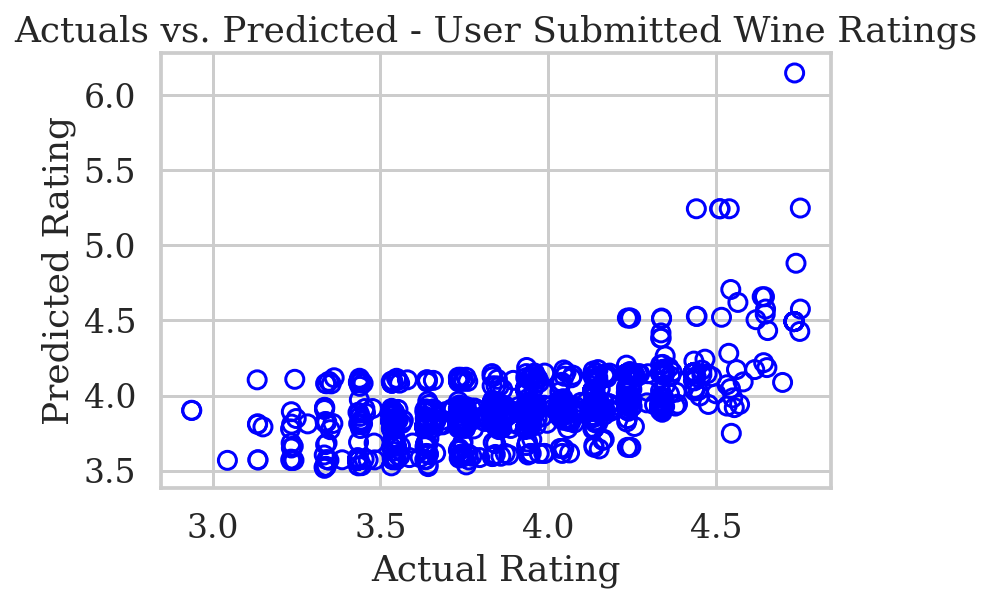

In [50]:
#actuals vs predicted
plt.scatter(y, y_predicted, facecolors='none', edgecolors='b')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actuals vs. Predicted - User Submitted Wine Ratings')

In [61]:
list(zip((['Rating Mean', 'Average Price', 'Australia', 'Brazil', 'Chile', 
               'France', 'Georgia', 'Germany', 'Italy', 'Lebanon', 'Macedonia', 
              'Mexico', 'New Zealand', 'Portugal', 'South Africa', 'Spain', 
              'United States', 'Uruguay']),lr.coef_))

[('Rating Mean', 0.0),
 ('Average Price', 0.0034622649235044062),
 ('Australia', -0.16392139534318934),
 ('Brazil', -0.003986180049452081),
 ('Chile', -0.5033566265692233),
 ('France', -0.417012997758284),
 ('Georgia', -0.2301679071270699),
 ('Germany', -0.22716998835692237),
 ('Italy', -0.19815517397282573),
 ('Lebanon', -0.41096606473922276),
 ('Macedonia', 0.05764747022369419),
 ('Mexico', -0.0004891471315106811),
 ('New Zealand', -0.06044124662835676),
 ('Portugal', -0.29928156618426666),
 ('South Africa', -0.5687412423799666),
 ('Spain', -0.2641501967518085),
 ('United States', -0.1931554109830703),
 ('Uruguay', -0.41614045919234266)]

In [63]:
y_resid = y - y_predicted

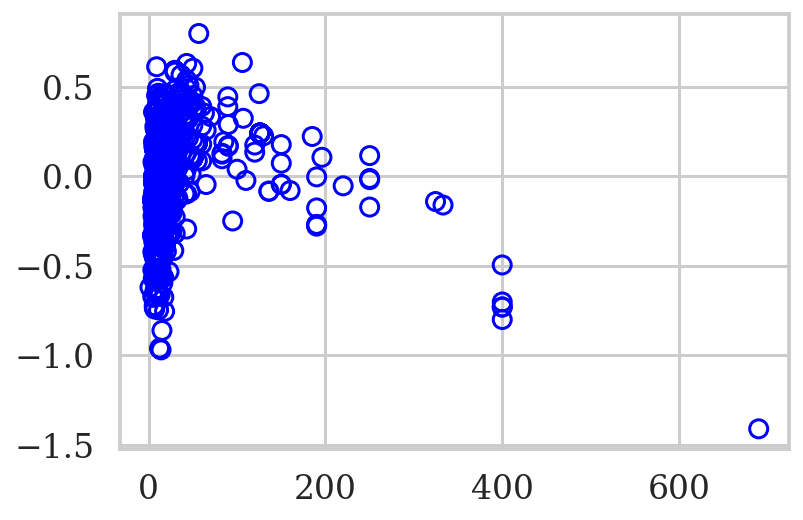

In [65]:
plt.scatter(wine_data_with_dummies['Average Price'], y_resid, facecolors='none', edgecolors='b')

In [ ]:
#challenge 4

In [69]:
wine_data_with_dummies


,Average Rating,Winery,Wine Name,Vintage,Type,Region,Country,Number of Reviews,Average Price,Rating Mean,...,Italy,Lebanon,Macedonia,Mexico,New Zealand,Portugal,South Africa,Spain,United States,Uruguay
18,4.123169,Marqués de Riscal,Rioja Reserva,2014,Red wine,Rioja,Spain,23169,18.99,3.906712,...,0,0,0,0,0,0,0,1,0,0
28,4.618701,Dom Pérignon,Brut Champagne,2006,Sparkling wine,Champagne,France,18701,249.99,3.906712,...,0,0,0,0,0,0,0,0,0,0
30,3.618200,Casillero del Diablo,Cabernet Sauvignon (Reserva),2017,Red wine,Central Valley,Chile,18200,9.99,3.906712,...,0,0,0,0,0,0,0,0,0,0
35,3.717321,Apothic,Red (Winemaker's Blend),2014,Red wine,California,United States,17321,13.98,3.906712,...,0,0,0,0,0,0,0,0,1,0
45,4.316529,San Marzano,Cinquanta Collezione,2012,Red wine,Vino d'Italia,Italy,16529,23.21,3.906712,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3165,3.731980,Paulo Laureano,Premium Vinhas Velhas Tinto,2015,Red wine,Alentejo,Portugal,3198,15.32,3.906712,...,0,0,0,0,0,1,0,0,0,0
3166,4.332000,Matarromera,Ribera del Duero Reserva,2014,Red wine,Ribera del Duero,Spain,3200,39.00,3.906712,...,0,0,0,0,0,0,0,1,0,0
3167,3.831960,Condado de Haza,Crianza Ribera del Duero,2012,Red wine,Ribera del Duero,Spain,3196,22.99,3.906712,...,0,0,0,0,0,0,0,1,0,0
3168,4.431960,Rutini,Malbec,2017,Red wine,Mendoza,Argentina,3196,26.99,3.906712,...,0,0,0,0,0,0,0,0,0,0


In [70]:
#convert vintage year to age
wine_data_with_dummies['Age'] = 2021 - wine_data_with_dummies['Vintage']

In [72]:
#dummify wine type

In [73]:
wine_data_type_dummies = pd.get_dummies(wine_data['Type'], drop_first = True)
combine_list = [wine_data_with_dummies, wine_data_type_dummies]
wine_data_both_dummies = pd.concat(combine_list, axis=1)

In [74]:
wine_data_both_dummies

,Average Rating,Winery,Wine Name,Vintage,Type,Region,Country,Number of Reviews,Average Price,Rating Mean,...,New Zealand,Portugal,South Africa,Spain,United States,Uruguay,Age,Rosé wine,Sparkling wine,White wine
18,4.123169,Marqués de Riscal,Rioja Reserva,2014,Red wine,Rioja,Spain,23169,18.99,3.906712,...,0,0,0,1,0,0,7,0,0,0
28,4.618701,Dom Pérignon,Brut Champagne,2006,Sparkling wine,Champagne,France,18701,249.99,3.906712,...,0,0,0,0,0,0,15,0,1,0
30,3.618200,Casillero del Diablo,Cabernet Sauvignon (Reserva),2017,Red wine,Central Valley,Chile,18200,9.99,3.906712,...,0,0,0,0,0,0,4,0,0,0
35,3.717321,Apothic,Red (Winemaker's Blend),2014,Red wine,California,United States,17321,13.98,3.906712,...,0,0,0,0,1,0,7,0,0,0
45,4.316529,San Marzano,Cinquanta Collezione,2012,Red wine,Vino d'Italia,Italy,16529,23.21,3.906712,...,0,0,0,0,0,0,9,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3165,3.731980,Paulo Laureano,Premium Vinhas Velhas Tinto,2015,Red wine,Alentejo,Portugal,3198,15.32,3.906712,...,0,1,0,0,0,0,6,0,0,0
3166,4.332000,Matarromera,Ribera del Duero Reserva,2014,Red wine,Ribera del Duero,Spain,3200,39.00,3.906712,...,0,0,0,1,0,0,7,0,0,0
3167,3.831960,Condado de Haza,Crianza Ribera del Duero,2012,Red wine,Ribera del Duero,Spain,3196,22.99,3.906712,...,0,0,0,1,0,0,9,0,0,0
3168,4.431960,Rutini,Malbec,2017,Red wine,Mendoza,Argentina,3196,26.99,3.906712,...,0,0,0,0,0,0,4,0,0,0


In [75]:
wine_data_both_dummies.columns.values

array(['Average Rating', 'Winery', 'Wine Name', 'Vintage', 'Type',
       'Region', 'Country', 'Number of Reviews', 'Average Price',
       'Rating Mean', 'Australia', 'Brazil', 'Chile', 'France', 'Georgia',
       'Germany', 'Italy', 'Lebanon', 'Macedonia', 'Mexico',
       'New Zealand', 'Portugal', 'South Africa', 'Spain',
       'United States', 'Uruguay', 'Age', 'Rosé wine', 'Sparkling wine',
       'White wine'], dtype=object)

In [5]:
#attempting first real model

X = wine_data_both_dummies[['Age', 'Average Price', 'Number of Reviews', 'Rosé wine', 
                            'Sparkling wine', 'White wine', 'Australia', 'Brazil', 
                            'Chile', 'France', 'Georgia', 'Germany', 'Italy', 
                            'Lebanon', 'Macedonia', 'Mexico', 'New Zealand', 'Portugal',
                            'South Africa', 'Spain', 'United States', 'Uruguay']]
y = wine_data_both_dummies['Average Rating']

lr = LinearRegression()
lr.fit(X, y)

y_predicted = lr.predict(X)

NameError: name 'wine_data_both_dummies' is not defined

In [78]:
score = lr.score(X, y)
score

0.4278768732175807

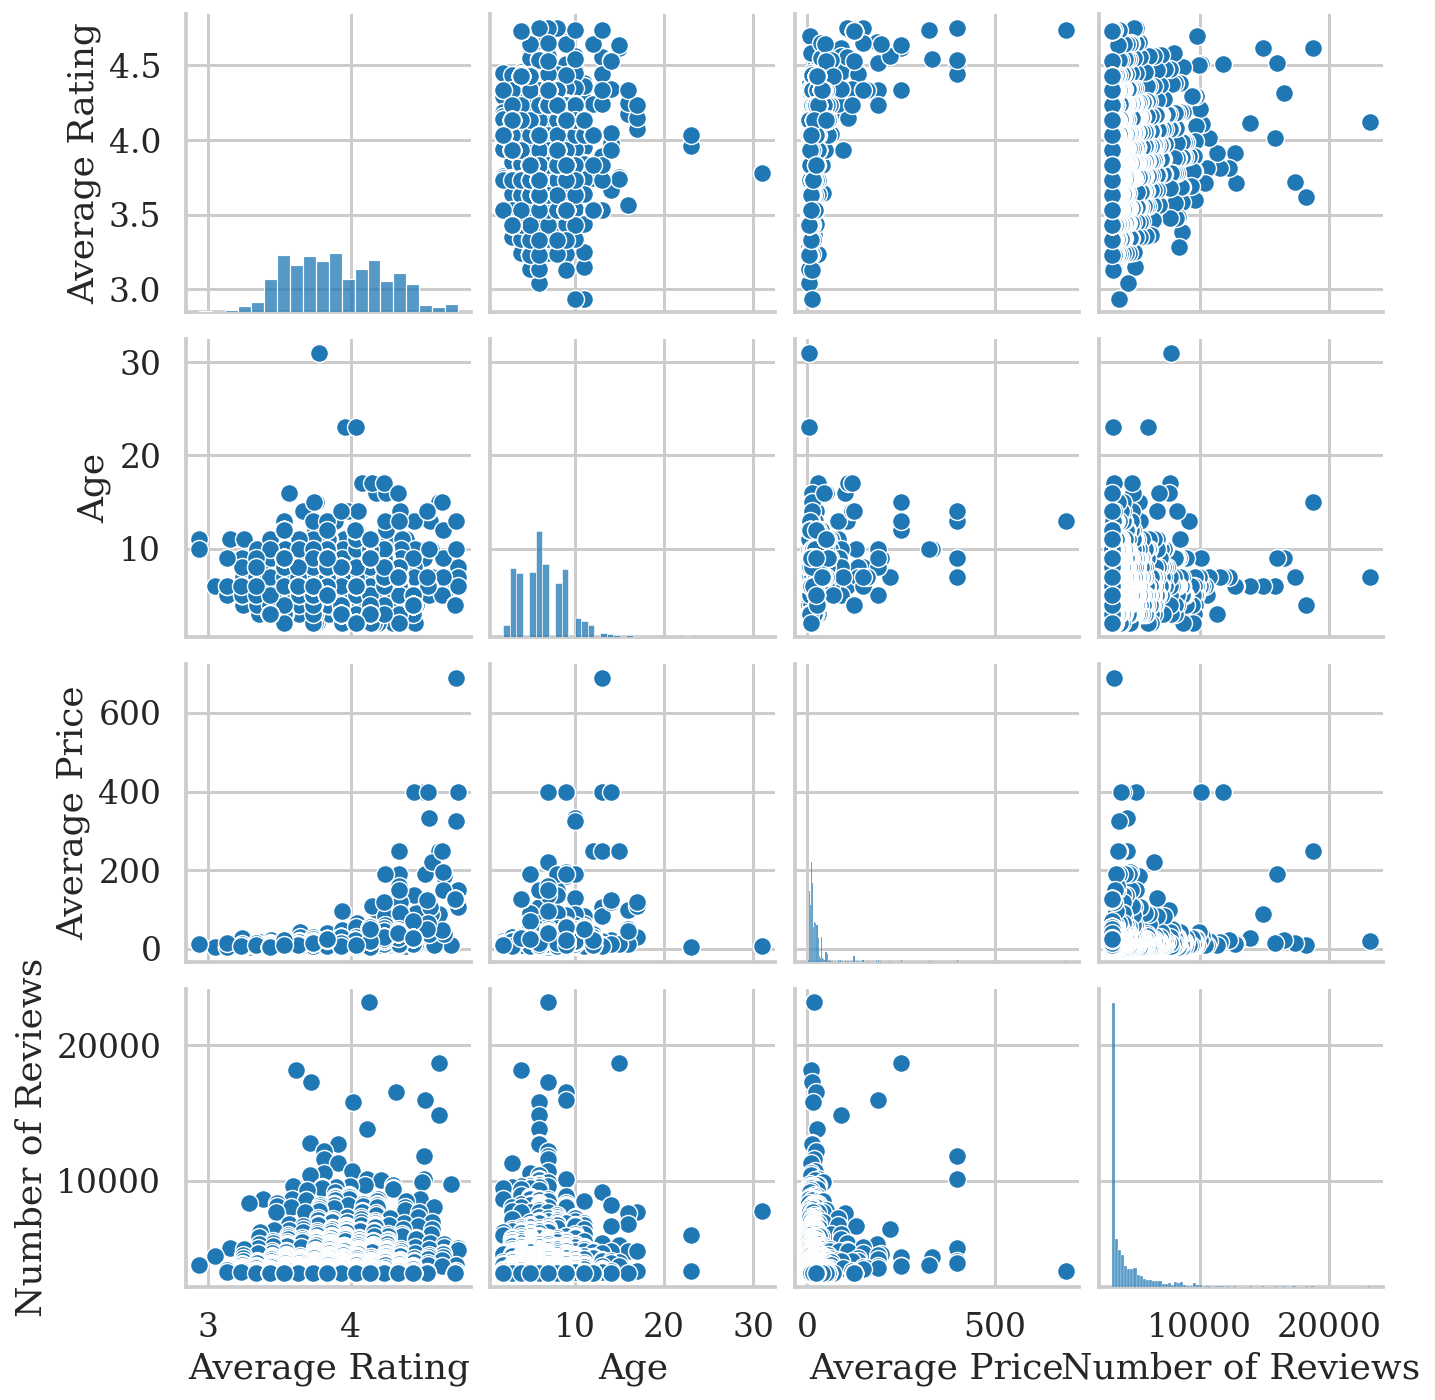

In [80]:
#feature engineering
sns.pairplot(wine_data_both_dummies[['Average Rating', 'Age', 'Average Price', 'Number of Reviews']])

In [81]:
#PRE-processing notebook
wine_data_both_dummies['Log Transform Price'] = log(wine_data_both_dummies['Average Price'])

In [82]:
X = wine_data_both_dummies[['Age', 'Average Price', 'Log Transform Price', 
                            'Number of Reviews', 'Rosé wine', 
                            'Sparkling wine', 'White wine', 'Australia', 'Brazil', 
                            'Chile', 'France', 'Georgia', 'Germany', 'Italy', 
                            'Lebanon', 'Macedonia', 'Mexico', 'New Zealand', 'Portugal',
                            'South Africa', 'Spain', 'United States', 'Uruguay']]
y = wine_data_both_dummies['Average Rating']

lr = LinearRegression()
lr.fit(X, y)

y_predicted = lr.predict(X)

In [83]:
score = lr.score(X, y)
score

0.6609334199974704

In [85]:
#try interatction terms
from sklearn.preprocessing import PolynomialFeatures
p = PolynomialFeatures(degree=2, interaction_only=True)
X_poly = p.fit_transform(X)
lr.fit(X_poly, y)
lr.score(X_poly, y)

0.7216556449750704

In [16]:
#nice

In [6]:
#train, test split on clean data frame
with open('wine_data_longer.pkl', 'rb') as picklefile: 
    wine_data_2 = pickle.load(picklefile)

In [7]:
#but first, clean

#drop rows with missing price
wine_data_2 = wine_data_2[wine_data_2['Average Price'] != 'error']

#drop rows after scraping got messed up
wine_data_2 = wine_data_2[:1408]

#drop rows with no vintage year
wine_data_2 = wine_data_2[wine_data_2['Vintage'] != 'N.V.']

In [8]:
#convert to numerical
wine_data_2['Average Rating'] = wine_data_2['Average Rating'].astype(float)
wine_data_2['Number of Reviews'] = wine_data_2['Number of Reviews'].astype(int)
wine_data_2['Average Price'] = wine_data_2['Average Price'].astype(float)
wine_data_2['Vintage'] = wine_data_2['Vintage'].astype(int)

In [9]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wine_data_2[['Vintage', 'Type', 'Country', 'Number of Reviews',
                                                                 'Average Price']], wine_data_2['Average Rating'], 
                                                    test_size = .25, random_state=100101)

In [14]:
#convert vintage year to age
X_train['Age'] = 2021 - X_train['Vintage']

In [15]:
#dummify wine type and country
X_train = pd.get_dummies(X_train[['Age', 'Country', 'Type', 'Number of Reviews', 'Average Price']], 
               prefix = ['Country_', 'Type_'], columns = ['Country', 'Type'], drop_first=True)

In [16]:
X_train.columns.values

array(['Age', 'Number of Reviews', 'Average Price', 'Country__Australia',
       'Country__Brazil', 'Country__Chile', 'Country__France',
       'Country__Georgia', 'Country__Germany', 'Country__Italy',
       'Country__Macedonia', 'Country__Mexico', 'Country__New Zealand',
       'Country__Portugal', 'Country__South Africa', 'Country__Spain',
       'Country__United States', 'Country__Uruguay', 'Type__Rosé wine',
       'Type__Sparkling wine', 'Type__White wine'], dtype=object)

In [17]:
#test out vanilla lin reg on clean split data
m_lin_reg = LinearRegression()
m_lin_reg.fit(X_train, y_train)
m_lin_reg.score(X_train, y_train)

0.4180188579835509

In [62]:
#feature engineer

#price appears to have a logarithmic relationship with target
X_train['Log Price'] = log(X_train['Average Price'])

#try interaction terms
from sklearn.preprocessing import PolynomialFeatures
p = PolynomialFeatures(degree=2, interaction_only=True)
X_train_poly = p.fit_transform(X_train)

In [63]:
#score again
m_lin_reg = LinearRegression()
m_lin_reg.fit(X_train_poly, y_train)
m_lin_reg.score(X_train_poly, y_train)


0.7470233389836525

In [64]:
m_lin_reg.score(p.transform(X_test), y_test)

-5.0693146427676945

,Age,Number of Reviews,Average Price,Country__Australia,Country__Brazil,Country__Chile,Country__France,Country__Georgia,Country__Germany,Country__Italy,...,Country__New Zealand,Country__Portugal,Country__South Africa,Country__Spain,Country__United States,Country__Uruguay,Type__Rosé wine,Type__Sparkling wine,Type__White wine,Log Price
1521,6,3677,5.59,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.720979
794,9,5090,32.99,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,3.496204
2997,3,3193,4.99,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.607436
1677,8,3521,5.84,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.764731
1067,6,4441,4.66,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.539015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1721,5,3483,19.99,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2.995232
2590,6,3198,15.32,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2.729159
2647,3,3193,4.99,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.607436
274,4,8053,13.99,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.638343


In [20]:
#nice

In [66]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler


In [67]:
#Try Lasso
m_Lasso = LassoCV(max_iter=10000)
p = PolynomialFeatures(degree=2)
X_train_poly = p.fit_transform(X_train)
s = StandardScaler(with_mean=False)
X_train_poly_std = s.fit_transform(X_train_poly)
m_Lasso.fit(X_train_poly_std, y_train)
m_Lasso.score(X_train_poly_std, y_train)

0.7492228341072747

In [68]:
X_train.columns.values

array(['Age', 'Number of Reviews', 'Average Price', 'Country__Australia',
       'Country__Brazil', 'Country__Chile', 'Country__France',
       'Country__Georgia', 'Country__Germany', 'Country__Italy',
       'Country__Macedonia', 'Country__Mexico', 'Country__New Zealand',
       'Country__Portugal', 'Country__South Africa', 'Country__Spain',
       'Country__United States', 'Country__Uruguay', 'Type__Rosé wine',
       'Type__Sparkling wine', 'Type__White wine', 'Log Price'],
      dtype=object)

In [104]:
lasso_coeffs = list(zip(p.get_feature_names(['Age', 'Number of Reviews', 'Average Price', 'Country__Australia',
       'Country__Brazil', 'Country__Chile', 'Country__France',
       'Country__Georgia', 'Country__Germany', 'Country__Italy',
       'Country__Macedonia', 'Country__Mexico', 'Country__New Zealand',
       'Country__Portugal', 'Country__South Africa', 'Country__Spain',
       'Country__United States', 'Country__Uruguay', 'Type__Rosé wine',
       'Type__Sparkling wine', 'Type__White wine', 'Log Price']),m_Lasso.coef_))


In [224]:
type(lasso_coeffs)

list

In [108]:
sorted(lasso_coeffs, key = lambda x: x[1])

[('Average Price Log Price', -0.32890085303374783),
 ('Age', -0.20644930449413196),
 ('Country__Portugal Log Price', -0.19771842369572667),
 ('Age Country__Portugal', -0.12244137020183478),
 ('Country__Italy Log Price', -0.06447315393674619),
 ('Country__Chile^2', -0.06096341211057262),
 ('Age Country__France', -0.044510188105658884),
 ('Country__Spain^2', -0.03667689932457428),
 ('Country__United States Log Price', -0.03065731068295321),
 ('Age Country__Australia', -0.029574072238067083),
 ('Average Price Country__New Zealand', -0.028582066766205276),
 ('Country__South Africa^2', -0.02507036975588491),
 ('Country__Uruguay^2', -0.023315339887300578),
 ('Average Price Country__Germany', -0.017925266599578167),
 ('Age Country__Spain', -0.016872428365929254),
 ('Number of Reviews^2', -0.015052926404729232),
 ('Average Price Country__Italy', -0.013400916684105157),
 ('Average Price Country__Australia', -0.011923302832901649),
 ('Country__France Type__Rosé wine', -0.011636256329651285),
 ('

In [215]:
remove_list = ['Average Price Log Price', 'Country__Portugal Log Price', 'Country__Portugal Log Price',
               'Country__Portugal Log Price', 'Age Country__Portugal', 'Country__Italy Log Price', 
               'Country__Chile^2', 'Age Country__France', 'Country__Spain^2', 'Country__United States Log Price', 
               'Age Country__Australia', 'Average Price Country__New Zealand', 'Average Price Country__New Zealand', 
               'Country__South Africa^2', 'Country__Uruguay^2', 'Average Price Country__Germany', 'Age Country__Spain', 
               'Number of Reviews^2', 'Average Price Country__Italy', 'Average Price Country__Australia', 'Average Price Type__White wine', 
               'Number of Reviews Country__Spain', 'Age Country__Uruguay', '1', 'Number of Reviews Country__Georgia',
               'Country__France^2', 'Number of Reviews Country__Mexico', 'Number of Reviews Country__Australia', 
                'Age Country__Georgia', 'Average Price Country__Mexico', 'Average Price Country__Georgia', 
               'Age Country__Macedonia', 'Average Price Country__Macedonia', 'Number of Reviews Type__Rosé wine', 
               'Number of Reviews Country__Macedonia', 'Age Type__White wine', 'Age Country__United States', 'Average Price Country__Chile', 
               'Country__New Zealand^2', 'Age Country__Chile', 'Average Price Country__Spain', 'Age Type__Rosé wine', 
               'Country__Portugal^2', 'Number of Reviews Country__New Zealand', 'Country__Australia^2', 
               'Average Price Country__Uruguay', 'Number of Reviews Country__Italy', 'Average Price Country__Portugal', 
               'Average Price^2', 'Age^2', 'Log Price^2'
              ]

In [211]:
X_train_poly_std_dropped = pd.DataFrame(data=X_train_poly_std, columns = p.get_feature_names(['Age', 'Number of Reviews', 'Average Price', 'Country__Australia',
       'Country__Brazil', 'Country__Chile', 'Country__France',
       'Country__Georgia', 'Country__Germany', 'Country__Italy',
       'Country__Macedonia', 'Country__Mexico', 'Country__New Zealand',
       'Country__Portugal', 'Country__South Africa', 'Country__Spain',
       'Country__United States', 'Country__Uruguay', 'Type__Rosé wine',
       'Type__Sparkling wine', 'Type__White wine', 'Log Price']))
X_train_poly_std_dropped

,1,Age,Number of Reviews,Average Price,Country__Australia,Country__Brazil,Country__Chile,Country__France,Country__Georgia,Country__Germany,...,Type__Rosé wine^2,Type__Rosé wine Type__Sparkling wine,Type__Rosé wine Type__White wine,Type__Rosé wine Log Price,Type__Sparkling wine^2,Type__Sparkling wine Type__White wine,Type__Sparkling wine Log Price,Type__White wine^2,Type__White wine Log Price,Log Price^2
0,1.0,2.137615,2.052340,0.147851,0.0,0.0,3.33486,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.604189
1,1.0,3.206422,2.841015,0.872556,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.493533
2,1.0,1.068807,1.782193,0.131981,0.0,0.0,3.33486,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.527095
3,1.0,2.850153,1.965268,0.154463,0.0,0.0,3.33486,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.635299
4,1.0,2.137615,2.478771,0.123253,0.0,0.0,3.33486,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.483178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,1.0,1.781345,1.944058,0.528718,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.830132
967,1.0,2.137615,1.784983,0.405200,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.519425
968,1.0,1.068807,1.782193,0.131981,0.0,0.0,3.33486,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.527095
969,1.0,1.425076,4.494831,0.370023,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.419986


In [213]:
type(X_train_poly_std_dropped)

pandas.core.frame.DataFrame

In [216]:
#drop weird columns
X_train_poly_std_dropped = X_train_poly_std_dropped.drop(columns=remove_list)
X_train_poly_std_dropped

,Age,Number of Reviews,Average Price,Country__Australia,Country__Brazil,Country__Chile,Country__France,Country__Georgia,Country__Germany,Country__Italy,...,Country__Uruguay Log Price,Type__Rosé wine^2,Type__Rosé wine Type__Sparkling wine,Type__Rosé wine Type__White wine,Type__Rosé wine Log Price,Type__Sparkling wine^2,Type__Sparkling wine Type__White wine,Type__Sparkling wine Log Price,Type__White wine^2,Type__White wine Log Price
0,2.137615,2.052340,0.147851,0.0,0.0,3.33486,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.206422,2.841015,0.872556,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.068807,1.782193,0.131981,0.0,0.0,3.33486,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.850153,1.965268,0.154463,0.0,0.0,3.33486,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.137615,2.478771,0.123253,0.0,0.0,3.33486,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,1.781345,1.944058,0.528718,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
967,2.137615,1.784983,0.405200,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
968,1.068807,1.782193,0.131981,0.0,0.0,3.33486,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
969,1.425076,4.494831,0.370023,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [218]:
#Lasso again with dropping some weird columns
m_Lasso.fit(X_train_poly_std_dropped, y_train)
m_Lasso.score(X_train_poly_std_dropped, y_train)

0.6818324196008099

In [228]:
lasso_reduced_coeffs = list(zip(m_Lasso.coef_, list(X_train_poly_std_dropped.columns)))

In [231]:
lasso_reduced_coeffs.sort(key = lambda x: x[0])
lasso_reduced_coeffs

[(-0.19253964424921108, 'Country__Spain'),
 (-0.12544068464678929, 'Age'),
 (-0.12178992959321301, 'Country__Chile'),
 (-0.09233060068547877, 'Type__White wine Log Price'),
 (-0.04674669357091302, 'Country__Portugal'),
 (-0.043288487799802856, 'Country__South Africa'),
 (-0.043180945408045616, 'Country__Italy^2'),
 (-0.042584835284306996, 'Country__France Log Price'),
 (-0.035028192282557144, 'Country__Uruguay'),
 (-0.026881384336980275, 'Number of Reviews Average Price'),
 (-0.016703652011227067, 'Country__United States'),
 (-0.015163120504058793, 'Age Country__New Zealand'),
 (-0.014265513306115543, 'Age Country__Germany'),
 (-0.012532173341569228, 'Country__Chile Type__White wine'),
 (-0.010519055879098927, 'Number of Reviews'),
 (-0.010374229514408626, 'Country__United States^2'),
 (-0.009261245411686657, 'Country__Spain Type__Sparkling wine'),
 (-0.008346197851059094, 'Number of Reviews Country__United States'),
 (-0.007570245918534787, 'Number of Reviews Log Price'),
 (-0.0071267

In [70]:
#try Ridge
m_Ridge = RidgeCV()
m_Ridge.fit(X_train_poly_std, y_train)
m_Ridge.score(X_train_poly_std, y_train)

0.7756559840692652

In [71]:
#transform test set and check

#convert vintage year to age
X_test['Age'] = 2021 - X_test['Vintage']

#dummify wine type and country
X_test = pd.get_dummies(X_test[['Age', 'Country', 'Type', 'Number of Reviews', 'Average Price']], 
               prefix = ['Country_', 'Type_'], columns = ['Country', 'Type'], drop_first=True)

KeyError: 'Vintage'

In [72]:
#log transform of price
X_test['Log Price'] = log(X_test['Average Price'])

In [73]:
#add in missing columns
X_test = X_test.reindex(columns = X_train.columns, fill_value=0)
X_test

,Age,Number of Reviews,Average Price,Country__Australia,Country__Brazil,Country__Chile,Country__France,Country__Georgia,Country__Germany,Country__Italy,...,Country__New Zealand,Country__Portugal,Country__South Africa,Country__Spain,Country__United States,Country__Uruguay,Type__Rosé wine,Type__Sparkling wine,Type__White wine,Log Price
2866,7,3200,39.00,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,3.663562
681,5,5468,13.99,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,2.638343
2246,6,3195,10.76,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2.375836
2089,3,3201,18.99,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,2.943913
2226,3,3212,6.66,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1.896119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,4,3196,26.99,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.295466
346,6,7309,8.82,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.177022
1414,11,3814,9.03,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2.200552
2178,9,3209,21.99,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,3.090588


In [74]:
#score current Lasso model
m_Lasso.score(s.transform(p.transform(X_test)),y_test)

0.13329954806135325

In [75]:
m_Lasso.alpha_

0.0007255354881396482

In [85]:
m_Lasso.mse_path_

array([[0.12002656, 0.11283621, 0.09857044, 0.09363079, 0.1234261 ],
       [0.11548569, 0.10663984, 0.09199593, 0.08837444, 0.11841983],
       [0.10786407, 0.09960814, 0.08634122, 0.08379883, 0.11098441],
       [0.10120772, 0.09350917, 0.08148222, 0.07981555, 0.10447386],
       [0.09539276, 0.08822032, 0.07731132, 0.0763477 , 0.09877065],
       [0.09031132, 0.083635  , 0.07373516, 0.07332837, 0.09377236],
       [0.08586947, 0.07966059, 0.07067281, 0.07069936, 0.08938974],
       [0.08198541, 0.0762166 , 0.06805411, 0.06841002, 0.08554497],
       [0.07858788, 0.07323309, 0.06581825, 0.0664163 , 0.08217023],
       [0.07561481, 0.07064927, 0.06391256, 0.06467986, 0.07920636],
       [0.07301214, 0.06841233, 0.06229141, 0.06316736, 0.07660179],
       [0.07073276, 0.0664764 , 0.06091528, 0.06184978, 0.07431151],
       [0.06873562, 0.06480162, 0.05974998, 0.06070187, 0.07229627],
       [0.06698494, 0.06335337, 0.05876592, 0.05970167, 0.07052181],
       [0.06544954, 0.06210158, 0.

In [76]:
#score Lasso on polyscaled data
m_Ridge.score(s.transform(p.transform(X_test)),y_test)

-1.035328260029821

In [77]:
m_Ridge.alpha_

0.1

In [92]:
#Lasso residual analysis of train set for model refining
y_train_pred = m_Lasso.predict(s.transform(p.transform(X_train)))

In [93]:
resid_train = y_train - y_train_pred

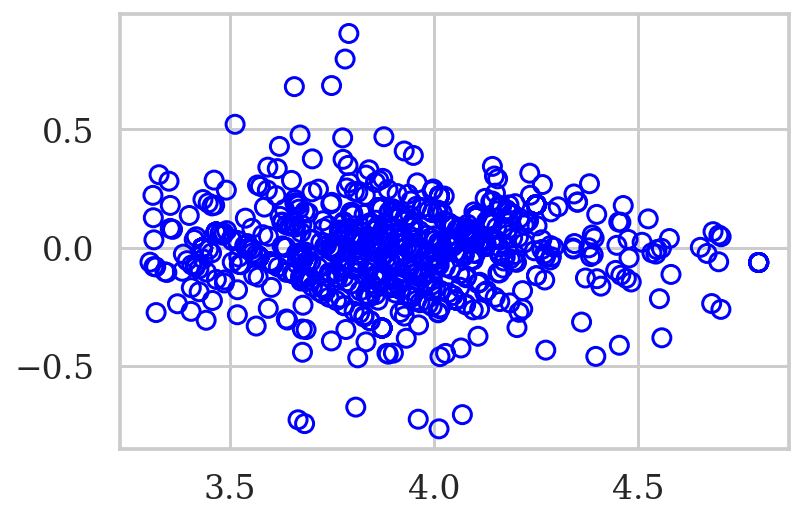

In [95]:
plt.scatter(y_train_pred, resid, facecolors='none', edgecolors='b')

In [91]:
mean(resid**2)

0.0956572763646032

(array([  6.,   9.,  42., 142., 463., 266.,  33.,   6.,   2.,   2.]),
 array([-0.7672022 , -0.59983714, -0.43247208, -0.26510702, -0.09774196,
         0.0696231 ,  0.23698816,  0.40435322,  0.57171828,  0.73908334,
         0.9064484 ]),
 <BarContainer object of 10 artists>)

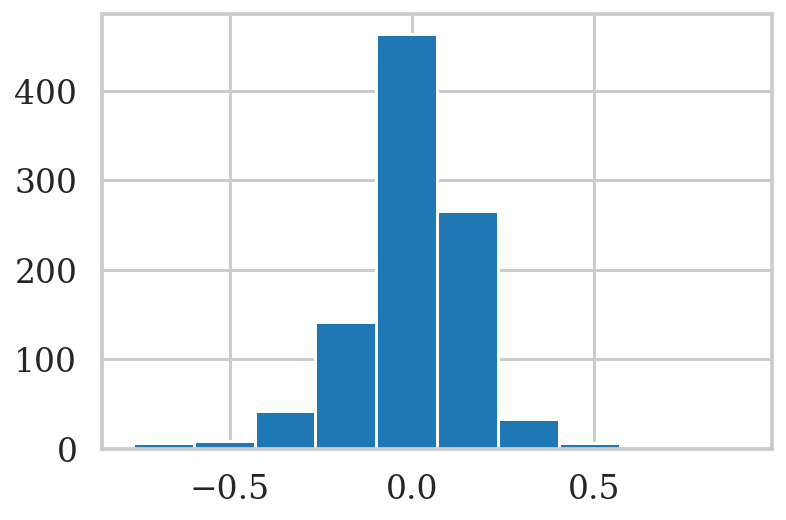

In [96]:
hist(resid)

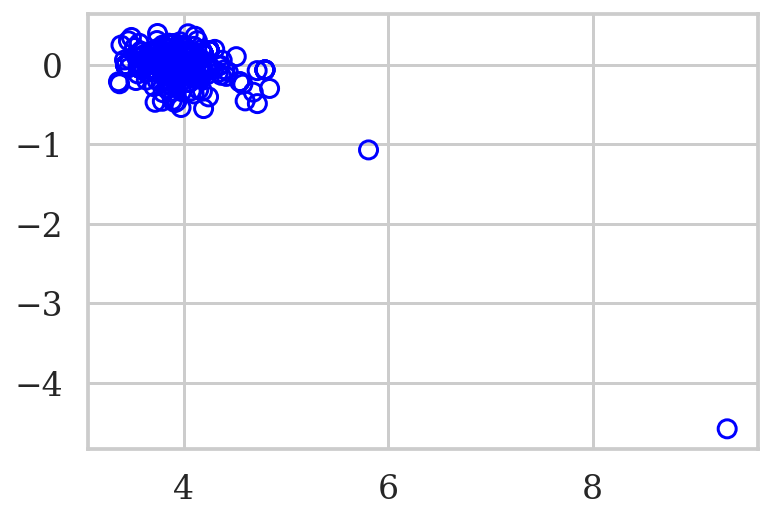

In [99]:
#resid test
y_test_pred = m_Lasso.predict(s.transform(p.transform(X_test)))
resid_test = y_test - y_test_pred
plt.scatter(y_test_pred, resid_test, facecolors='none', edgecolors='b')

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  2.,  8., 10., 13., 27., 93., 77., 66., 19.,  7.]),
 array([-4.58353084e+00, -4.48394473e+00, -4.38435861e+00, -4.28477249e+00,
        -4.18518638e+00, -4.08560026e+00, -3.98601414e+00, -3.88642803e+00,
        -3.78684191e+00, -3.68725580e+00, -3.58766968e+00, -3.48808356e+00,
        -3.38849745e+00, -3.28891133e+00, -3.18932521e+00, -3.08973910e+00,
        -2.99015298e+00, -2.89056687e+00, -2.79098075e+00, -2.69139463e+00,
        -2.59180852e+00, -2.49222240e+00, -2.39263629e+00, -2.29305017e+00,
        -2.19346405e+00, -2.09387794e+00, -1.99429182e+00, -1.89470570e+00,
        -1.79511959e+00, -1.69553347e+00, -1.59594736e+00, -1.49636124e+00,
        -1.39677512e+00, -1.29718901e+00, -1.19760289e+00, -1.09801677e+00,
        -9.98430658e-01, -8.9884

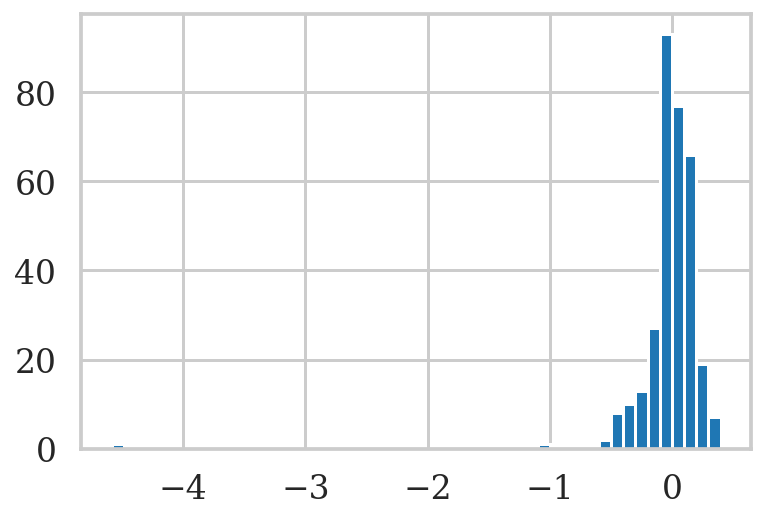

In [102]:
hist(resid_test, bins=50)

In [103]:
X_test

,Age,Number of Reviews,Average Price,Country__Australia,Country__Brazil,Country__Chile,Country__France,Country__Georgia,Country__Germany,Country__Italy,...,Country__New Zealand,Country__Portugal,Country__South Africa,Country__Spain,Country__United States,Country__Uruguay,Type__Rosé wine,Type__Sparkling wine,Type__White wine,Log Price
2866,7,3200,39.00,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,3.663562
681,5,5468,13.99,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,2.638343
2246,6,3195,10.76,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2.375836
2089,3,3201,18.99,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,2.943913
2226,3,3212,6.66,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1.896119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,4,3196,26.99,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.295466
346,6,7309,8.82,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.177022
1414,11,3814,9.03,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2.200552
2178,9,3209,21.99,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,3.090588


In [109]:
#graphs for presentation
sns.set_theme(color_codes=True)

In [117]:
#price scatterplot with LOBF
X_train_price_only = X_train[['Average Price']]

lr = LinearRegression()
lr.fit(X_train_price_only, y_train)

y_predicted_w_priceonly = lr.predict(X_train_price_only)

Text(0.5, 1.0, 'Price vs. Rating')

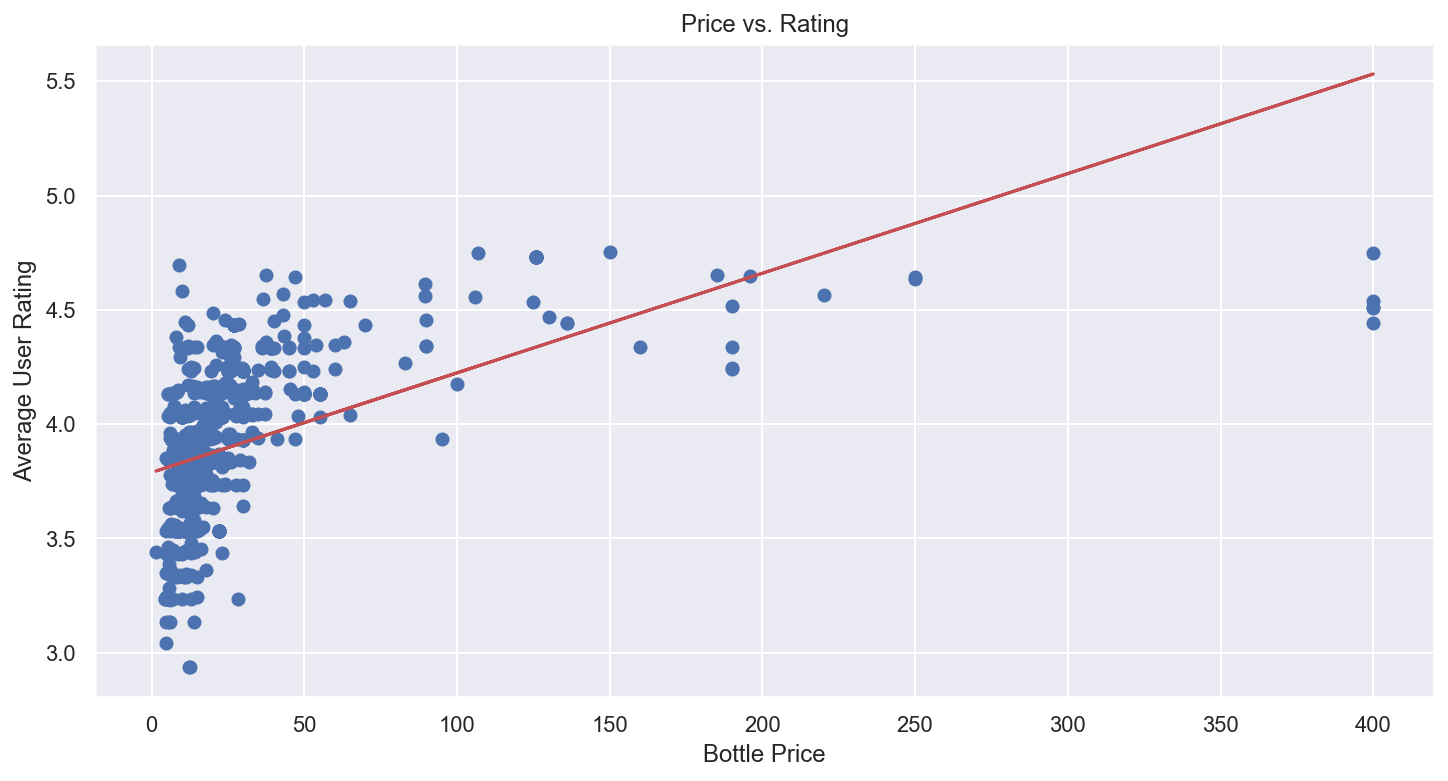

In [120]:
plt.figure(figsize=(12, 6))
plt.plot(X_train_price_only, y_train, 'o')
plt.plot(X_train_price_only, y_predicted_w_priceonly, 'r')
plt.xlabel('Bottle Price')
plt.ylabel('Average User Rating')
plt.title('Price vs. Rating')

Text(0.5, 1.0, 'Age vs. Rating')

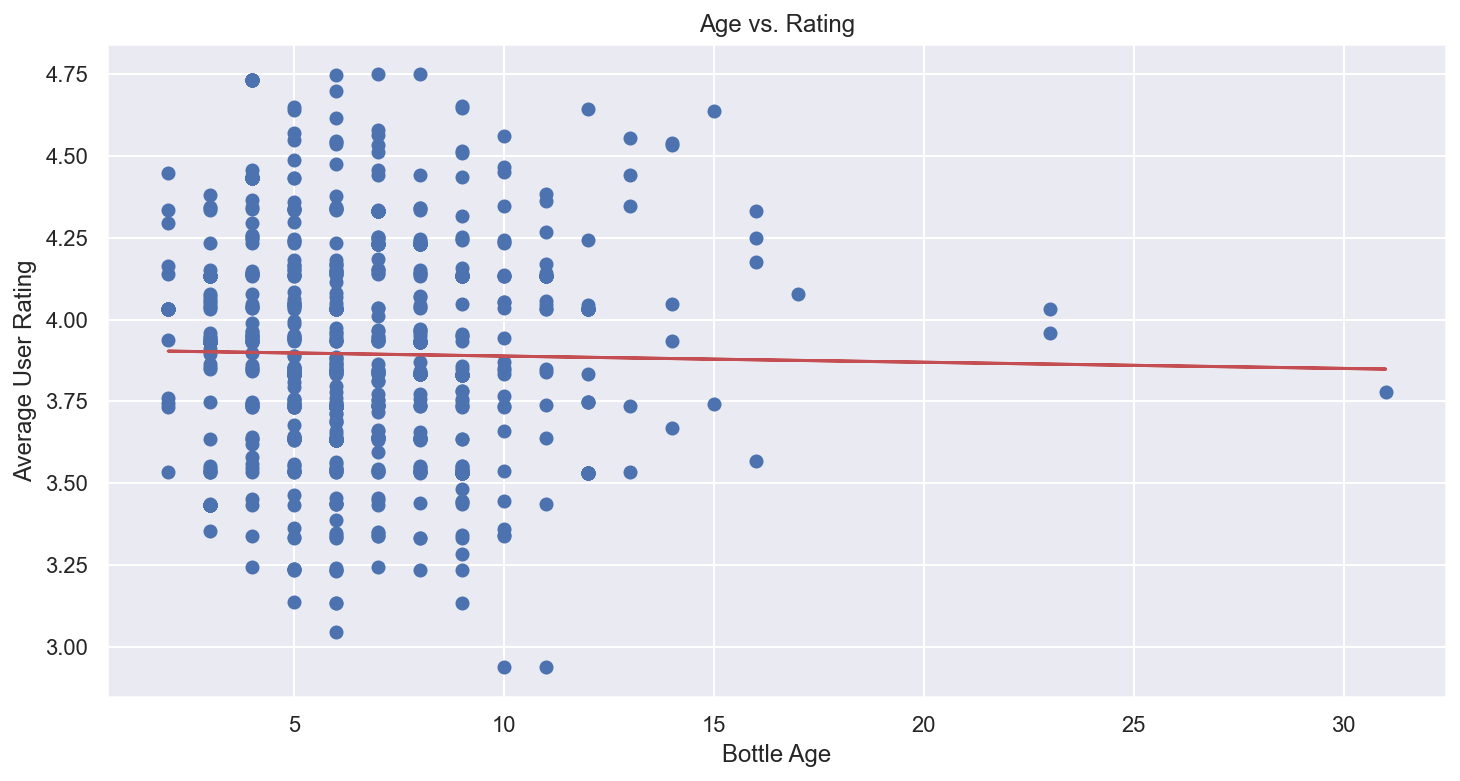

In [121]:
#price scatterplot with LOBF
X_train_age_only = X_train[['Age']]

lr = LinearRegression()
lr.fit(X_train_age_only, y_train)

y_predicted_w_ageonly = lr.predict(X_train_age_only)

plt.figure(figsize=(12, 6))
plt.plot(X_train_age_only, y_train, 'o')
plt.plot(X_train_age_only, y_predicted_w_ageonly, 'r')
plt.xlabel('Bottle Age')
plt.ylabel('Average User Rating')
plt.title('Age vs. Rating')

In [132]:
wine_data

,Average Rating,Winery,Wine Name,Vintage,Type,Region,Country,Number of Reviews,Average Price
18,4.123169,Marqués de Riscal,Rioja Reserva,2014,Red wine,Rioja,Spain,23169,18.99
28,4.618701,Dom Pérignon,Brut Champagne,2006,Sparkling wine,Champagne,France,18701,249.99
30,3.618200,Casillero del Diablo,Cabernet Sauvignon (Reserva),2017,Red wine,Central Valley,Chile,18200,9.99
35,3.717321,Apothic,Red (Winemaker's Blend),2014,Red wine,California,United States,17321,13.98
45,4.316529,San Marzano,Cinquanta Collezione,2012,Red wine,Vino d'Italia,Italy,16529,23.21
...,...,...,...,...,...,...,...,...,...
3165,3.731980,Paulo Laureano,Premium Vinhas Velhas Tinto,2015,Red wine,Alentejo,Portugal,3198,15.32
3166,4.332000,Matarromera,Ribera del Duero Reserva,2014,Red wine,Ribera del Duero,Spain,3200,39.00
3167,3.831960,Condado de Haza,Crianza Ribera del Duero,2012,Red wine,Ribera del Duero,Spain,3196,22.99
3168,4.431960,Rutini,Malbec,2017,Red wine,Mendoza,Argentina,3196,26.99


In [168]:
#barchart for type of wine
wine_ratings_by_country = wine_data.groupby('Country')['Average Rating'].mean()
wine_ratings_by_country

Country
Argentina        4.168953
Australia        3.930606
Brazil           4.152220
Chile            3.602390
France           3.728185
Georgia          3.844450
Germany          3.873253
Italy            3.982492
Lebanon          4.285440
Macedonia        4.132300
Mexico           4.135030
New Zealand      4.046852
Portugal         3.824327
South Africa     3.540103
Spain            3.877099
United States    3.967404
Uruguay          3.680417
Name: Average Rating, dtype: float64

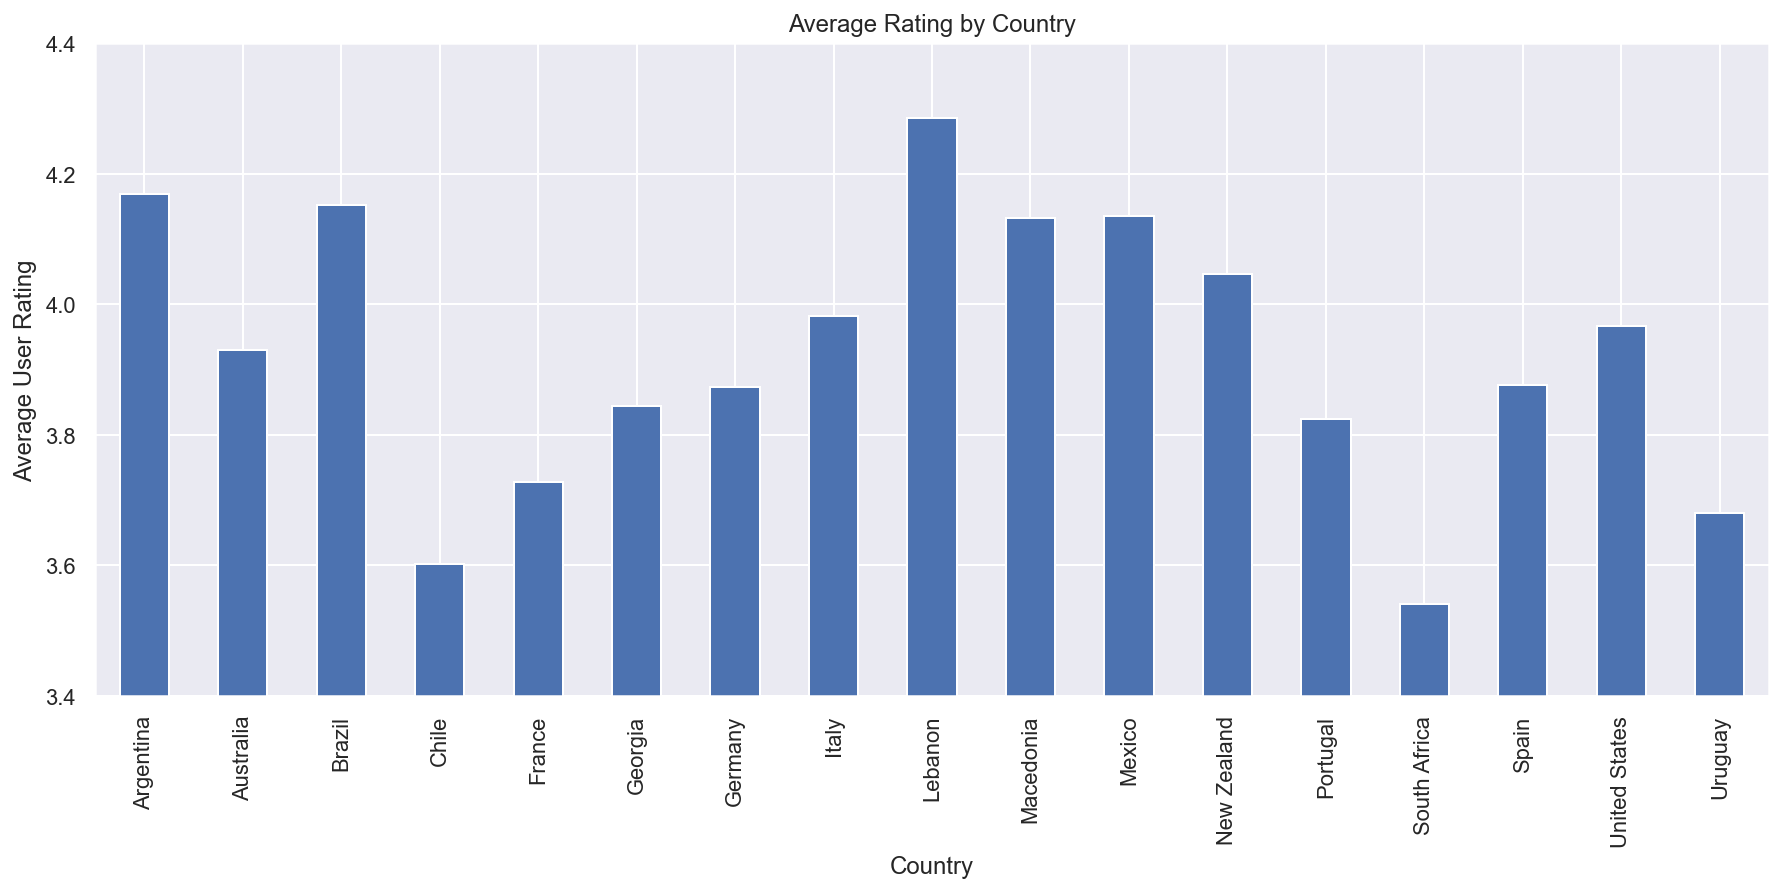

In [194]:
ax = wine_ratings_by_country.plot.bar(x = 'country', y='Average User Rating', figsize = (15,6), title='Average Rating by Country')
ax.set_ylabel("Average User Rating")
ax.set_ylim(3.4,4.4)
ax.set_title=('Average Rating by Country')

(3.5, 4.5)

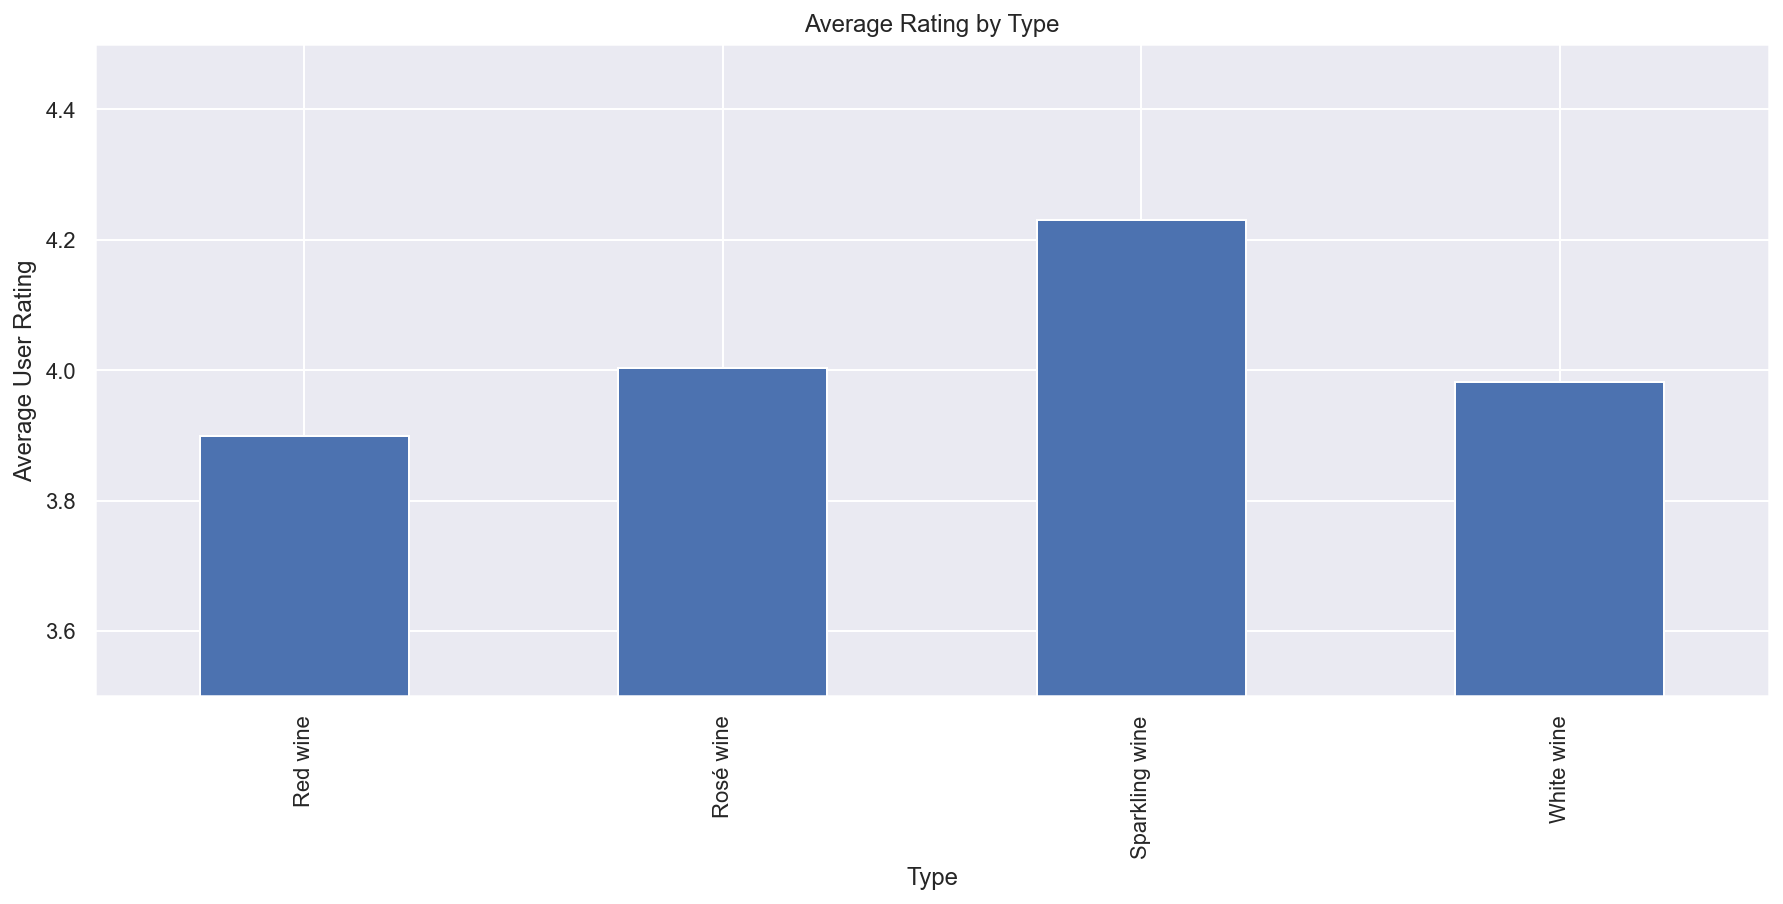

In [195]:
#type bar chart
wine_ratings_by_type = wine_data.groupby('Type')['Average Rating'].mean()
ax = wine_ratings_by_type.plot.bar(x = 'Type', y='Average User Rating', figsize = (15,6), title='Average Rating by Type')
ax.set_ylabel("Average User Rating")
ax.set_ylim(3.5,4.5)